# 斯坦福吴恩达机器学习第二周作业

先导包，加载文件

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

data1_file_path = './ex2data1.txt'
data = pd.read_csv(data1_file_path, names=['exam1', 'exam2', 'admitted'])

##  Part 1: Plotting 

['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n']


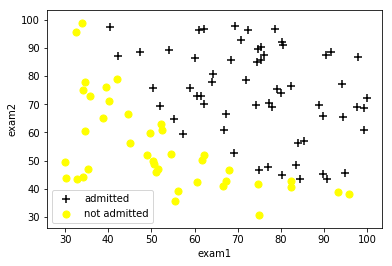

In [8]:
print(['Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.\n'])
positive = data['admitted'].isin([1])
negative = data['admitted'].isin([0])
data1 = data[positive]
data2 = data[negative]
plt.scatter(data1['exam1'],data1['exam2'],marker='+',c='black',label='admitted',s=50)
plt.scatter(data2['exam1'],data2['exam2'],marker='o',c='yellow',label='not admitted',s=50)
plt.xlabel('exam1')
plt.ylabel('exam2')
plt.legend()
plt.show()

## Part 2: Compute Cost and Gradient

In [39]:
X = data.iloc[:,0:2]
[m,n] = X.shape
X.insert(0, 'one', np.ones((m,1)))
X = X.values
y = data.iloc[:, 2:3].values
initial_theta = np.zeros((n + 1, 1))

$h = \frac{1}{1+e^{-z}}$

In [69]:
def sigmoid(z):
    sigmoid = 1/ (1 + np.exp(-z))
    return sigmoid

代价函数和梯度的公式：

$J(\theta) = \frac{1}{m} * (-y^T log(h) - (1-y)^T log(1-h))$

$gradient = \frac{1}{m} X^T(h-y)$

In [76]:
def cost_function(theta, X, y):
    m = len(y)
    J = (-y.T.dot(np.log(sigmoid(X.dot(theta))))
         - (np.ones((m,1)) - y).T.dot(np.log(np.ones((m,1)) - sigmoid(X.dot(theta)))))/m
    return J

def gradient(theta, X, y):
    grad = X.T.dot(sigmoid(X.dot(theta)) - y) / m
    return grad

In [77]:
cost = cost_function(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost at initial theta (zeros): %s \n' % cost)
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros): \n')
print(' %s \n' % grad)
print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros): [[0.69314718]] 

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]] 

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [78]:
test_theta = np.array(([-24], [0.2], [0.2]))
cost = cost_function(test_theta, X, y)
grad = gradient(test_theta, X, y)
print('\nCost at test theta: %s\n' % cost)
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta: \n')
print(' %s \n' % grad)
print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')


Cost at test theta: [[0.21833019]]

Expected cost (approx): 0.218

Gradient at test theta: 

 [[0.04290299]
 [2.56623412]
 [2.64679737]] 

Expected gradients (approx):
 0.043
 2.566
 2.647



## Part 3: Optimizing using fminunc

In [83]:
# theta = initial_theta
# result = op.minimize(fun=cost_function, x0=initial_theta, args=(X, y), method='TNC', jac = gradient)
# print('Cost at theta found by fminunc: %s\n' % cost);
# print('Expected cost (approx): 0.203\n');
# print('theta: \n');
# print(' %s \n'% theta);
# print('Expected theta (approx):\n')
# print(' -25.161\n 0.206\n 0.201\n')

## Part 4: Predict and Accuracies

In [84]:
def predict(theta,X):
    pre = X.dot(theta) >=0
    return pre+0

In [87]:
# 上面计算theta的地方不正确，先写死正确答案 TODO
theta = np.array([(-24.933067),(0.204408),(0.199619)]).reshape((3,1))
X_prob = np.array([1,45,85]).reshape((1,3))
prob = sigmoid(X_prob.dot(theta))
print('For a student with scores 45 and 85, we predict an admission probability of %s \n' % prob)
print('Expected value: 0.775 +/- 0.002\n\n')

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %s \n' % (np.mean((p == y) + 0) * 100))
print('Expected accuracy (approx): 89.0\n')
print('\n')

For a student with scores 45 and 85, we predict an admission probability of [[0.77432714]] 

Expected value: 0.775 +/- 0.002


Train Accuracy: 89.0 

Expected accuracy (approx): 89.0



